# billstein03

In [1]:
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import cumulative_trapezoid

In [2]:
EXPID = 'billstein03'
EXPTYPE = 'mfci'
DATE = '2015-02-05'

## Load Data

Fix for slightly 'broken' logger timeline

In [3]:
SRATE = 1.0e5
DURATION = 2.0
index = np.arange(DURATION * SRATE) / SRATE

In [4]:
data = pd.read_csv(
    '../../data/sensors/2015-02-05_billstein 03.txt', skiprows=2, sep='\t',
    names=['trig', 'force', 'mic', 'el', 'pos', 'seis', 'shockw'],
    index_col=0
)
data.index = index
data.index.name = 't'
data.force *= 5e2
data.shockw *= 1e5
data.head()

trig     force       mic        el       pos      seis   shockw
t                                                                           
0.00000  0.342236 -5.540840 -0.000453  0.042705  6.524551  0.127411 -786.092
0.00001  0.003412 -5.862915 -0.011726  0.043349  6.524229  0.116460 -786.092
0.00002  0.010819 -6.346030  0.001801  0.043349  6.523907  0.081354 -786.092
0.00003  0.010819 -5.379800  0.003090  0.043027  6.524551  0.075557 -850.507
0.00004  0.011142 -5.701880 -0.010438  0.043349  6.524229  0.080388 -786.092

In [5]:
units = ['s', 'V', 'N', 'V', 'V', 'V', 'V', 'Pa']

## Show Raw Data

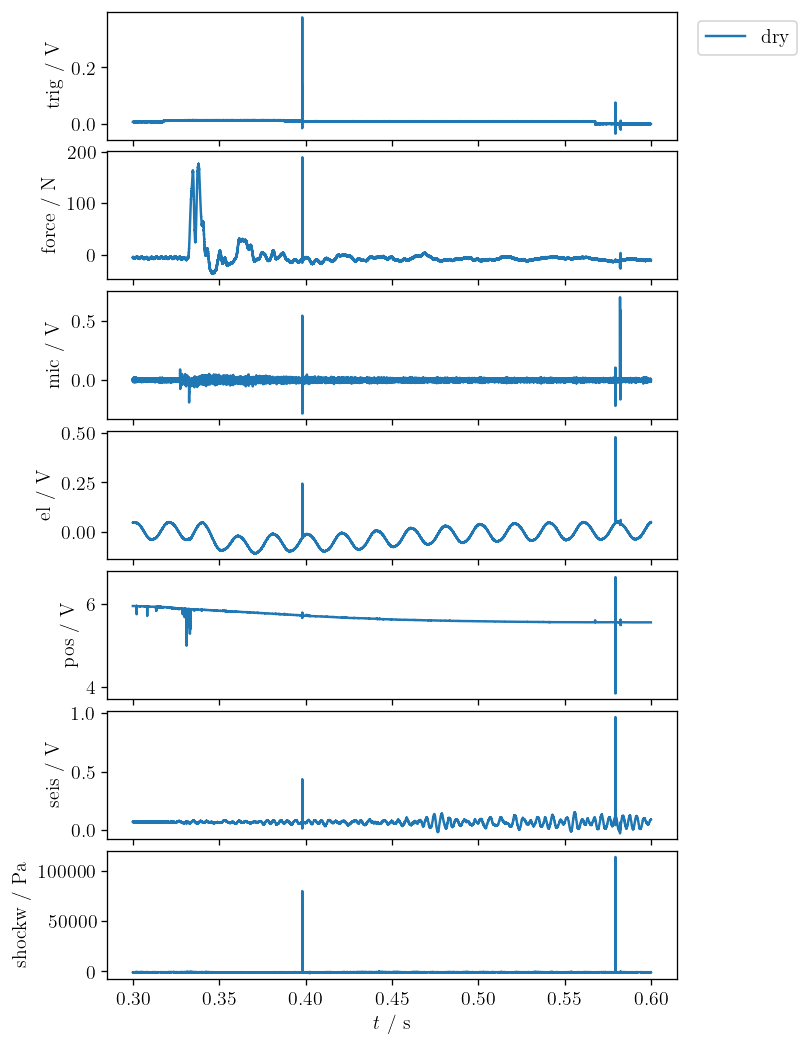

In [6]:
fig, axs = plt.subplots(nrows=data.shape[1], sharex=True)

for ax, col in zip(axs, data.columns):
    ax.plot(data.loc[0.3:.6, col], label='dry')
axs[0].legend(loc='upper left', bbox_to_anchor=(1.02, 1))
axs[-1].set(xlabel=r'$t\ /\ \mathrm{s}$')
for ax, nm, unt in zip(axs, data.columns, units[1:]):
    ax.set_ylabel(f'{nm} / {unt}')
fig.set_size_inches(7, 9)
fig.tight_layout(pad=1, h_pad=0.)

- Mic is noisy and caught a spike in important interval
- electric signal not useful

In [7]:
ttrig = 0.3176154
tspike = 0.5794651

## Summary Entries

In [8]:
fmax, fmin = data.loc[ttrig:0.39, 'force'].max(), data.loc[ttrig:.39, 'force'].min()

### Summary

In [9]:
summ = pd.read_csv('../../data/summary.csv', index_col=0)
summ.loc[EXPID, 'exptype'] = EXPTYPE
summ.loc[EXPID, ['ttrig', 'tspike']] = [ttrig, tspike]
summ.loc[EXPID, ['Fmin', 'Fmax']] = fmin, fmax
summ

exptype     ttrig    tspike        Fmax        Fmin       pmax
expid                                                                      
H254-dry-01      dry  1.987832  2.497630  762.867700  -300.95020  3695707.0
H254-MFCI-03    ifci  1.987743  2.497569 -210.446800  1157.73400  4479971.0
billstein01     mfci  0.317654  0.579460  286.260300   -39.35883        NaN
billstein02     mfci  0.317585  0.579495  679.032600   -86.86507        NaN
billstein03     mfci  0.317615  0.579465  177.559495   -37.42638        NaN

### asdf

In [10]:
import asdf

In [11]:
tree = {
    'id': EXPID,
    'date': DATE,
    'srate': SRATE,
    'summ': dict(summ.loc[EXPID]),
    'fields': ['t'] + list(data.columns),
    'units': units,
    'time': {'ttrig': ttrig, 'tspike': tspike, 't': data.index.values},
}
for col in data.columns:
    tree[col] = data[col].values
af = asdf.AsdfFile(tree)